Importing the Dependencies

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor as regressor
from sklearn import metrics

Data Collection and Processing

In [70]:
# loading the data from csv file to Pandas DataFrame
data = pd.read_csv(r'C:\Projects\Blinkit Analysis\dataset.csv')

In [71]:
# first 5 rows of the dataframe
data.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [72]:
# number of data points & number of features
data.shape

(8523, 12)

In [73]:
# getting some information about thye dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
Item Fat Content,
Item Identifier,
Outlet Identifier,
Outlet Location Type,
Outlet Size,
Outlet Type,


In [74]:
# checking for missing values
data.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

Handling missing values

In [75]:
# mean value of "Item_Weight" column
data['Item Weight'].mean()

12.857645184135977

In [76]:
# filling the missing values in "Item_weight column" with "Mean" value
data['Item Weight'].fillna(data['Item Weight'].mean(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17092\747668604.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item Weight'].fillna(data['Item Weight'].mean(), inplace=True)


In [77]:
# checking for missing values
data.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

Data Analysis

In [78]:
data.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.226124,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,9.310000,93.826500,4.000000
50%,2016.000000,0.053931,12.857645,143.012800,4.000000
75%,2018.000000,0.094585,16.000000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


Numerical Features

<Figure size 600x600 with 0 Axes>

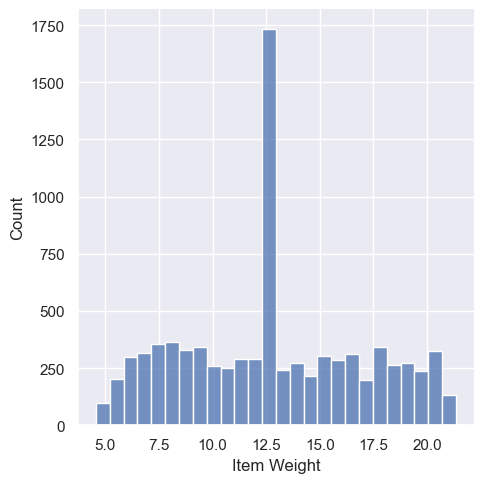

In [23]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.displot(data['Item Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

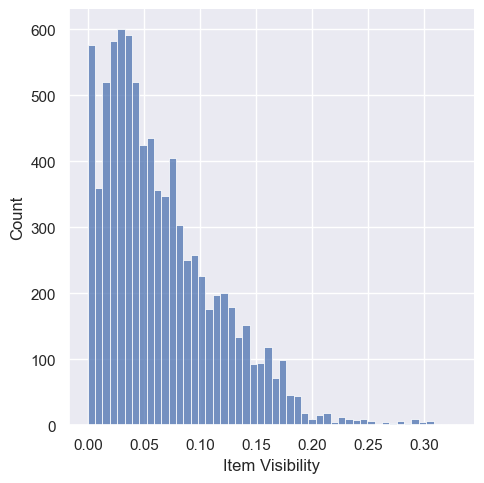

In [79]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.displot(data['Item Visibility'])
plt.show()

<Figure size 600x600 with 0 Axes>

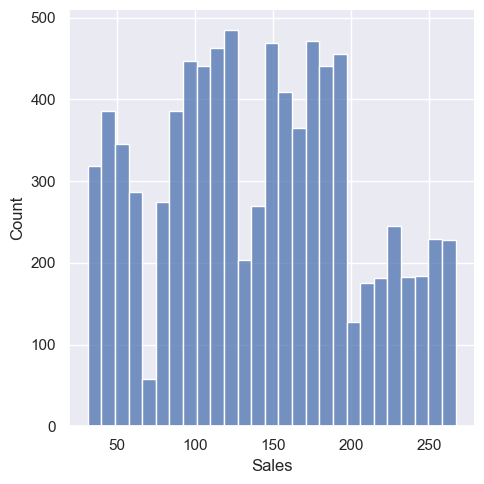

In [80]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.displot(data['Sales'])
plt.show()

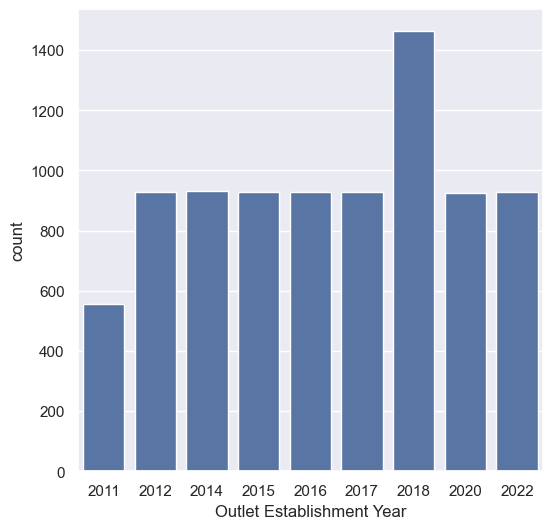

In [81]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet Establishment Year', data=data)
plt.show()

Categorical Features


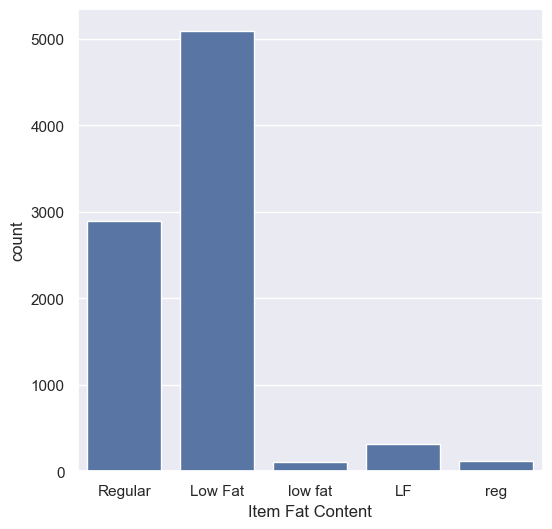

In [82]:
# Item Fat Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item Fat Content', data=data)
plt.show()

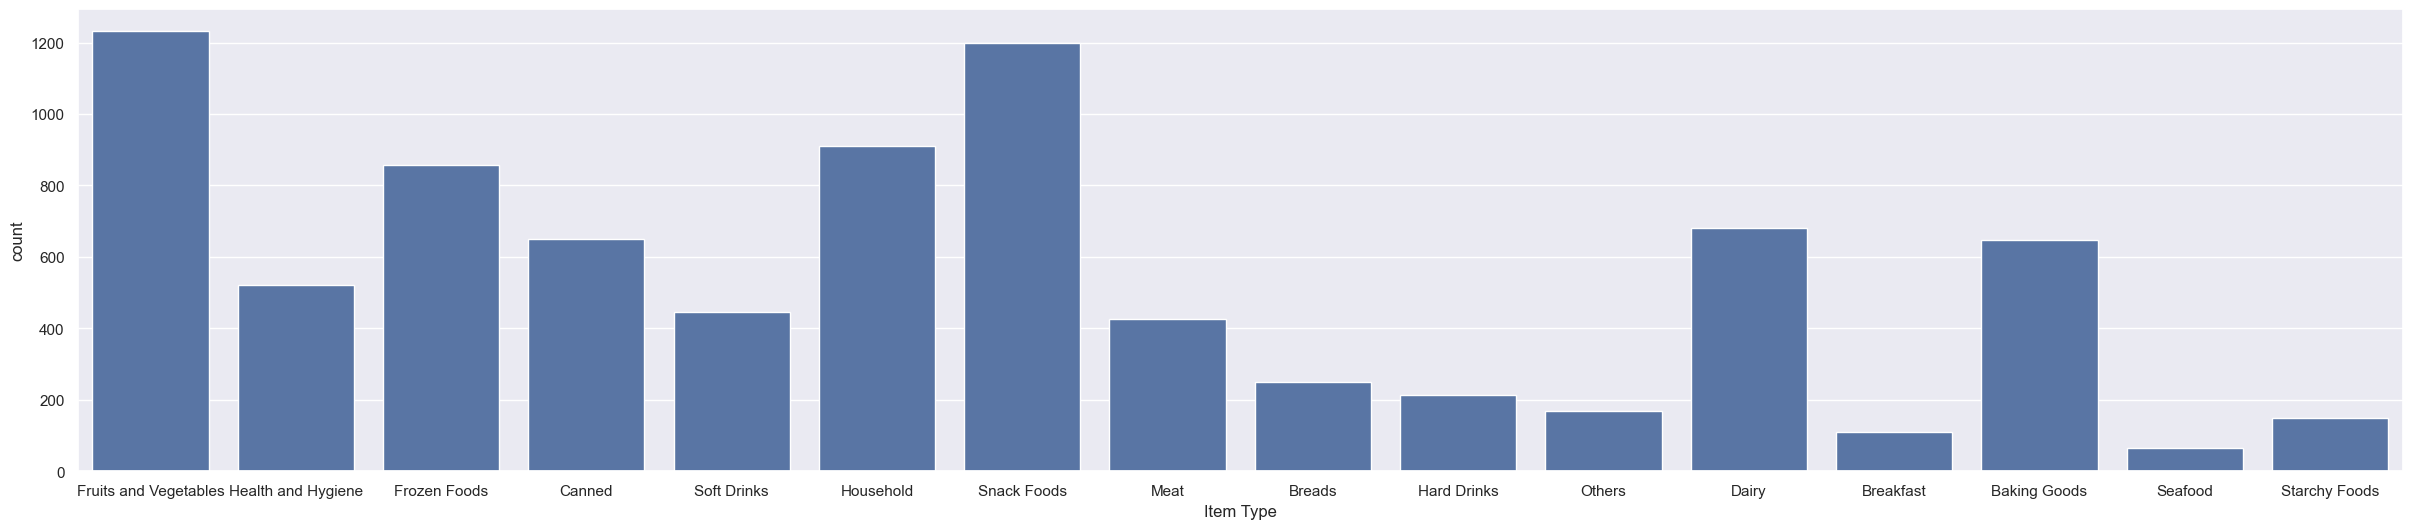

In [83]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item Type', data=data)
plt.show()

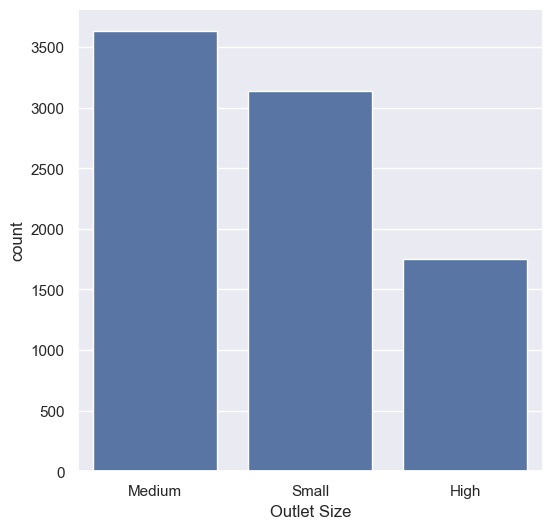

In [84]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet Size', data=data)
plt.show()

Data Preprocessing

In [85]:
data.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [86]:
data['Item Fat Content'].value_counts()

Item Fat Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [87]:
data.replace({'Item Fat Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [88]:
data['Item Fat Content'].value_counts()

Item Fat Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Label Encoding

In [89]:
encoder = LabelEncoder()

In [90]:
data['Item Identifier'] = encoder.fit_transform(data['Item Identifier'])

data['Item_Fat_Content'] = encoder.fit_transform(data['Item Fat Content'])

data['Item Type'] = encoder.fit_transform(data['Item Type'])

data['Outlet Identifier'] = encoder.fit_transform(data['Outlet Identifier'])

data['Outlet Size'] = encoder.fit_transform(data['Outlet Size'])

data['Outlet Location_Type'] = encoder.fit_transform(data['Outlet Location Type'])

data['Outlet Type'] = encoder.fit_transform(data['Outlet Type'])

In [91]:
data.drop(columns=['Item Fat Content', 'Outlet Location Type'], inplace=True)

In [92]:
data.head()

,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Item_Fat_Content,Outlet Location_Type
0,1142,6,2012,9,1,1,0.100014,15.10,145.4786,5.0,1,0
1,1280,8,2022,3,1,2,0.008596,11.80,115.3492,5.0,0,2
2,843,5,2016,8,2,1,0.025896,13.85,165.0210,5.0,1,0
3,611,3,2014,1,0,1,0.042278,12.15,126.5046,5.0,1,2
4,82,14,2015,7,2,1,0.033970,19.60,55.1614,5.0,0,1


Splitting features and Target

In [93]:
X = data.drop(columns='Sales', axis=1)
Y = data['Sales']

In [94]:
print(X)

      Item Identifier  Item Type  Outlet Establishment Year  \
0                1142          6                       2012   
1                1280          8                       2022   
2                 843          5                       2016   
3                 611          3                       2014   
4                  82         14                       2015   
...               ...        ...                        ...   
8518             1497          8                       2018   
8519              658         13                       2018   
8520               29         14                       2018   
8521              958          4                       2018   
8522              651         13                       2018   

      Outlet Identifier  Outlet Size  Outlet Type  Item Visibility  \
0                     9            1            1         0.100014   
1                     3            1            2         0.008596   
2                     8          

In [95]:
print(Y)

0       145.4786
1       115.3492
2       165.0210
3       126.5046
4        55.1614
          ...   
8518    164.5526
8519    241.6828
8520     86.6198
8521     97.8752
8522    112.2544
Name: Sales, Length: 8523, dtype: float64


Splitting the data into Training data & Testing Data

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [100]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Machine Learning Model Training

XGBoost Regressor

In [101]:
regressor = XGBRegressor()

In [102]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation




In [103]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [104]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [105]:
print('R Squared value = ', r2_train)

R Squared value =  0.8837555728677774


In [106]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [107]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [108]:
print('R Squared value = ', r2_test)

R Squared value =  0.6745679191814236
